In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq
from math import pi
%matplotlib inline

sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')


# Reading the data

In [14]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', low_memory=False)
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv', low_memory=False)
#recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-20-2021.csv', low_memory=False)
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/06-20-2021.csv', low_memory=False)
apple_mobility = pd.read_csv("https://covid19-static.cdn-apple.com/covid19-mobility-data/2110HotfixDev13/v3/en-us/applemobilitytrends-2021-06-19.csv", low_memory=False)

In [15]:
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

# Cleaning the data

In [16]:
confirmed_df.head()
deaths_df.head()
latest_data.head()
us_medical_data.head()
apple_mobility.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-06-10,2021-06-11,2021-06-12,2021-06-13,2021-06-14,2021-06-15,2021-06-16,2021-06-17,2021-06-18,2021-06-19
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,160.69,172.44,211.70,200.47,158.15,165.14,170.67,179.85,197.50,223.81
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,177.61,200.04,202.22,167.59,195.39,195.57,203.92,200.21,215.65,198.46
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,65.95,80.01,77.53,50.73,59.10,63.14,63.77,68.67,86.73,89.82
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,57.81,66.70,67.11,41.62,51.86,54.42,54.68,58.34,65.54,71.14
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,114.90,117.58,97.85,93.39,101.50,106.51,109.61,119.09,121.45,99.47


# An analysis of a Country's COVID-19 situation

In [33]:
country = "Pakistan"
cols = confirmed_df.columns[4:]


#Confirmed
country_conf_df = confirmed_df[confirmed_df["Country/Region"]==country].groupby(by="Country/Region").sum().reset_index()
country_conf_df = country_conf_df.loc[:, cols]
country_conf_df = country_conf_df.unstack().to_frame().reset_index()
country_conf_df.columns = ["Date","dummy","confirmed"]
country_conf_df.drop(columns="dummy", inplace=True)
country_conf_df.set_index(keys="Date", inplace=True)

#Deaths
country_death_df = deaths_df[deaths_df["Country/Region"]==country].groupby(by="Country/Region").sum().reset_index()
country_death_df = country_death_df.loc[:, cols]
country_death_df = country_death_df.unstack().to_frame().reset_index()
country_death_df.columns = ["Date","dummy","death"]
country_death_df.drop(columns="dummy", inplace=True)
country_death_df.set_index(keys="Date", inplace=True)

#Recoveries
country_rec_df = recoveries_df[recoveries_df["Country/Region"]==country].groupby(by="Country/Region").sum().reset_index()
country_rec_df = country_rec_df.loc[:, cols]
country_rec_df = country_rec_df.unstack().to_frame().reset_index()
country_rec_df.columns = ["Date","dummy","recovered"]
country_rec_df.drop(columns="dummy", inplace=True)
country_rec_df.set_index(keys="Date", inplace=True)


df = pd.merge(country_conf_df, country_death_df, how="inner", on="Date")
df = pd.merge(df, country_rec_df, how="inner", on="Date")
    

In [34]:
#fig , axes = plt.subplots(figsize=(15,6), dpi=150)
#df.plot(kind="line", y="confirmed", ax=axes, legend=False)
#plt.xlabel("Date", fontsize=12)
#plt.ylabel("Count", fontsize=12)
#plt.title(f"{country} COVID-19 confirmed cases", fontsize=15)
#plt.ticklabel_format(axis="y", style="plain")
#plt.tight_layout()
#plt.fill_between(x=df.index, y1=df["confirmed"], alpha=0.5)
#plt.show()


In [35]:

conf_daily = []
for c in range(0,len(df["confirmed"].values)-1):
    res = df["confirmed"].values[c+1] - df["confirmed"].values[c]
    conf_daily.append(res)

death_daily = []
for c in range(0,len(df["death"].values)-1):
    res = df["death"].values[c+1] - df["death"].values[c]
    death_daily.append(res)

recv_daily = []
for c in range(0,len(df["recovered"].values)-1):
    res = df["recovered"].values[c+1] - df["recovered"].values[c]
    recv_daily.append(res)

c = pd.DataFrame(conf_daily)
c.columns = ["confirmed"]

d = pd.DataFrame(death_daily)
d.columns = ["death"]

r = pd.DataFrame(recv_daily)
r.columns = ["recovered"]


In [36]:
avg_daily_confirmed = round(np.mean(conf_daily))
avg_daily_death = round(np.mean(death_daily))
avg_daily_recovery = round(np.mean(recv_daily))

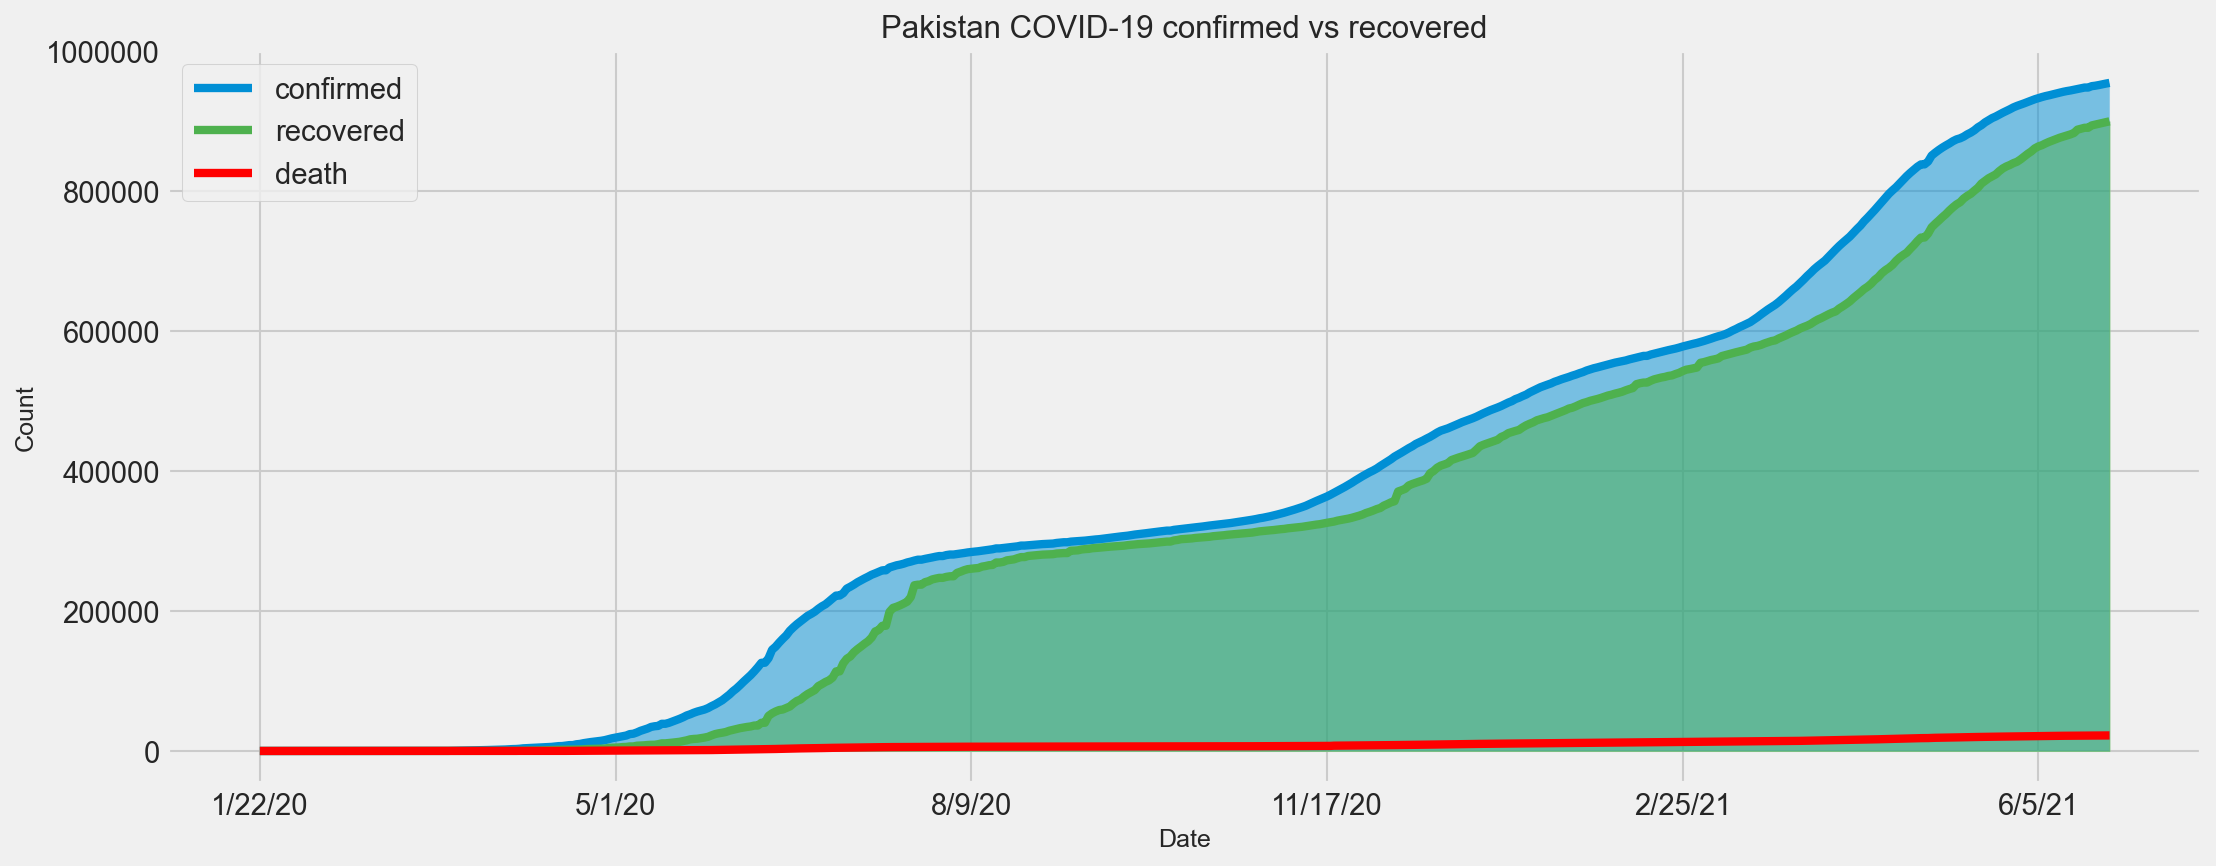

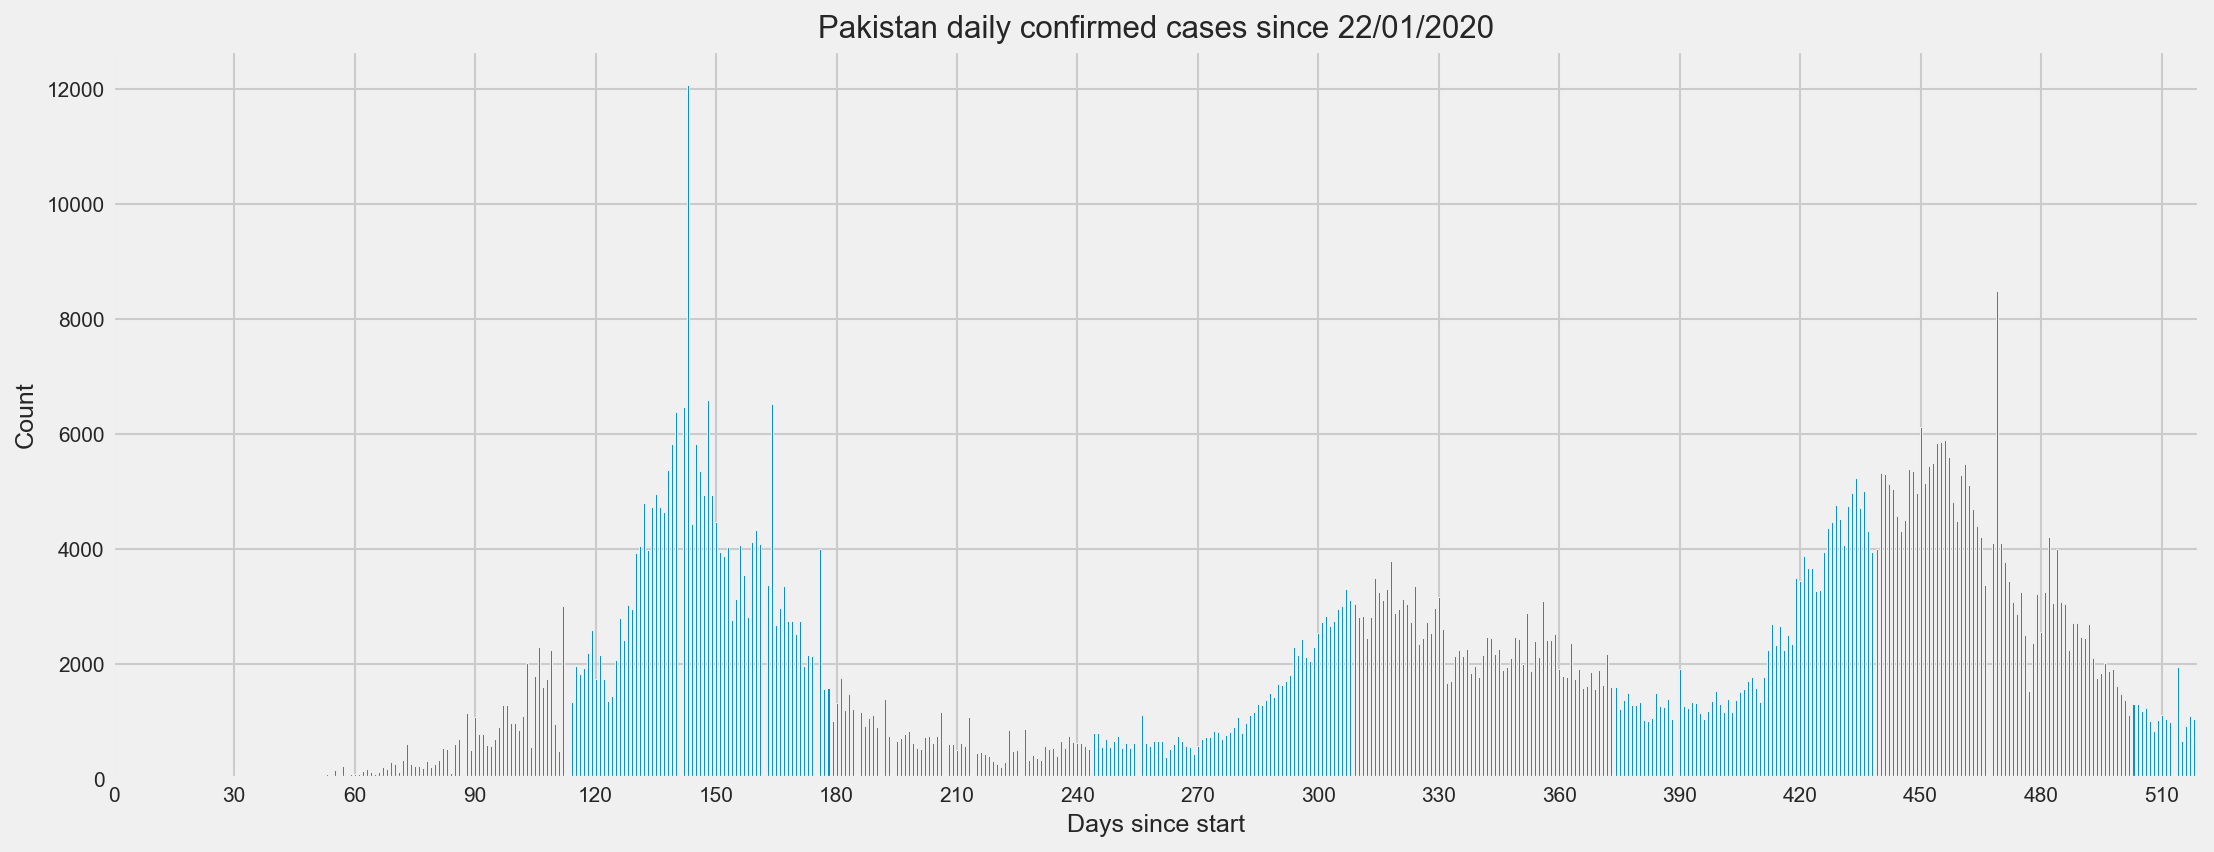

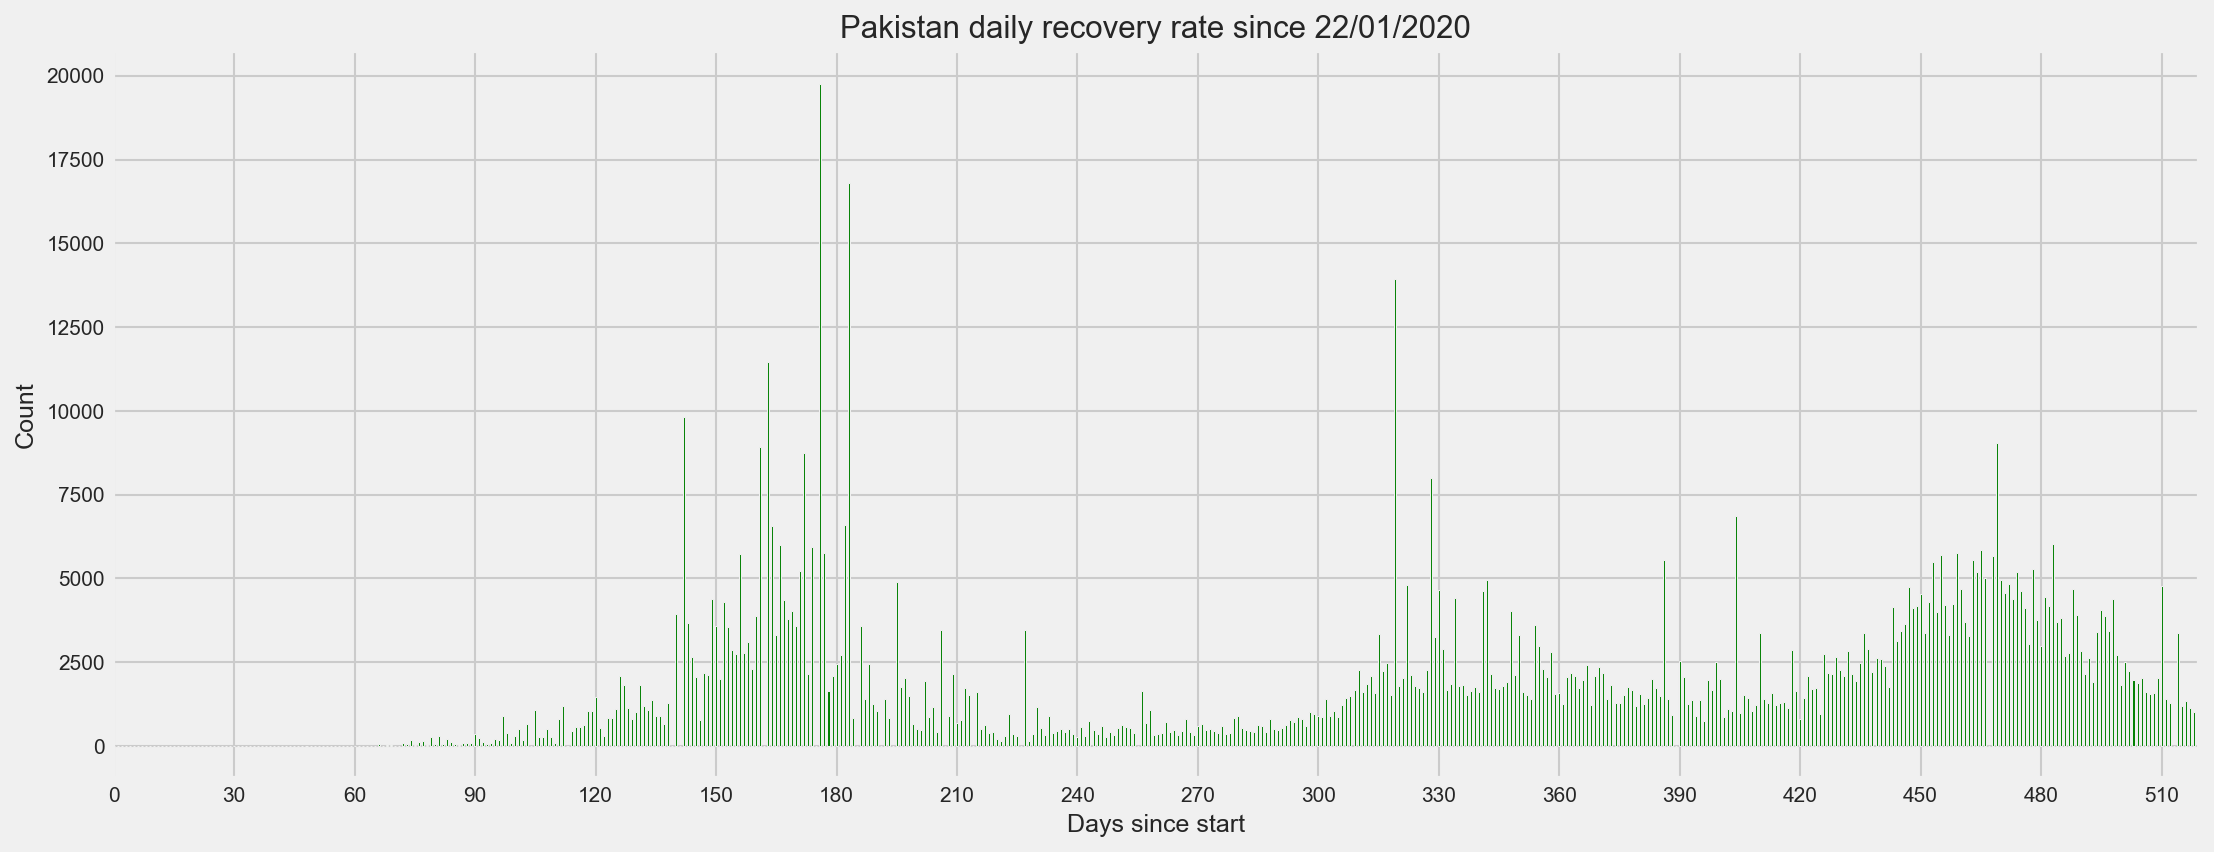

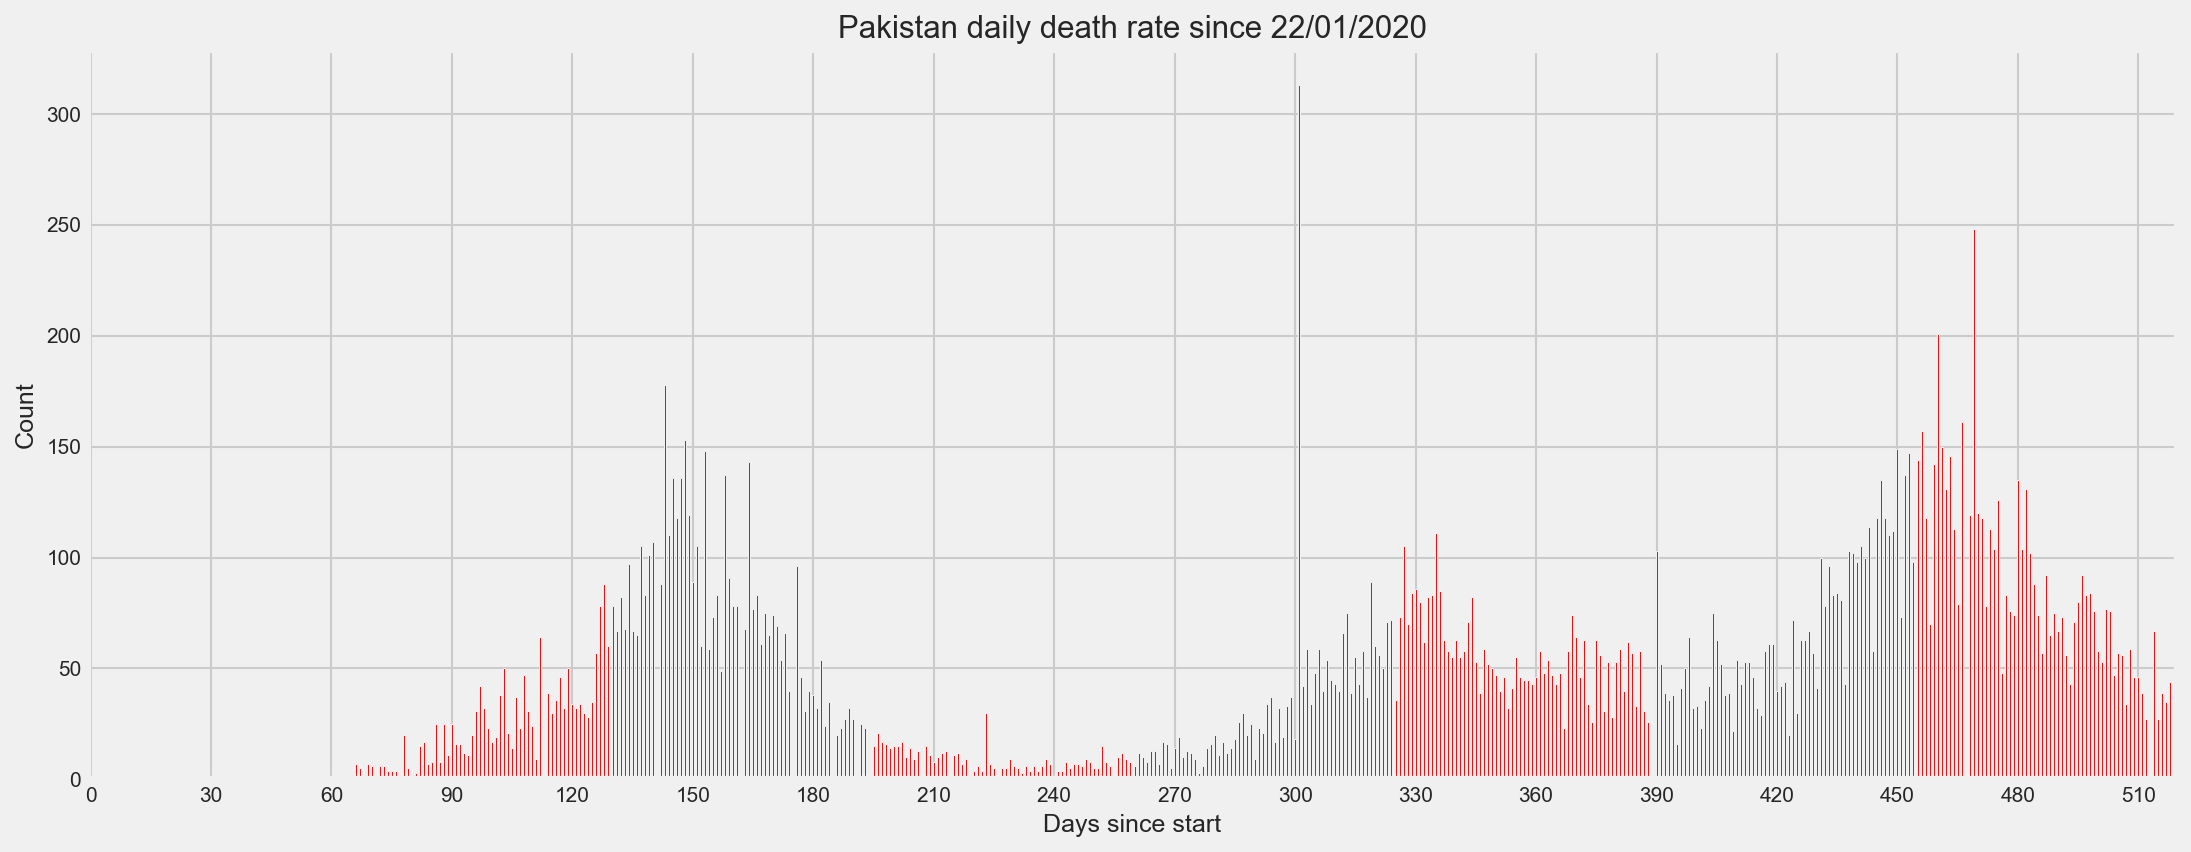

Avg. daily confirmed cases : 1834 
Avg. daily recovery rates : 1729 
Avg. daily death rates : 43


In [37]:
fig , axes = plt.subplots(figsize=(15,6), dpi=150)
df.plot(kind="line", y="confirmed", ax=axes)
df.plot(kind="line", y="recovered", ax=axes, color="#4eb14e")
df.plot(kind="line", y="death", ax=axes, color="red")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title(f"{country} COVID-19 confirmed vs recovered", fontsize=15)
plt.ticklabel_format(axis="y", style="plain")
plt.fill_between(x=df.index, y1=df["confirmed"], alpha=0.5)
plt.fill_between(x=df.index, y1=df["recovered"],color="#4eb14e", alpha=0.5)
plt.tight_layout()
plt.show()

fig , axes = plt.subplots(figsize=(16,6), dpi=150)
c.plot(kind="bar", ax=axes,legend=False)
plt.xticks([i for i in c.index[::30]], rotation=360, fontsize=10)
plt.yticks(fontsize=10)
plt.title(f"{country} daily confirmed cases since 22/01/2020", fontsize=15)
plt.xlabel("Days since start", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

fig , axes = plt.subplots(figsize=(16,6), dpi=150)
r.plot(kind="bar", ax=axes, color="green",legend=False)
plt.xticks([i for i in r.index[::30]], rotation=360, fontsize=10)
plt.yticks(fontsize=10)
plt.title(f"{country} daily recovery rate since 22/01/2020", fontsize=15)
plt.xlabel("Days since start", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

fig , axes = plt.subplots(figsize=(16,6), dpi=150)
d.plot(kind="bar", ax=axes, color="red",legend=False)
plt.xticks([i for i in d.index[::30]], rotation=360, fontsize=10)
plt.yticks(fontsize=10)
plt.title(f"{country} daily death rate since 22/01/2020", fontsize=15)
plt.xlabel("Days since start", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

print(f"Avg. daily confirmed cases : {avg_daily_confirmed} \nAvg. daily recovery rates : {avg_daily_recovery} \nAvg. daily death rates : {avg_daily_death}")

# Comparing the situation in different countries

In [38]:
countries = ['France','Italy','Germany','Belgium','Netherlands']

In [39]:
countries_all_confirmed_df = pd.DataFrame()
idx = 0

for idx,cnt in enumerate(countries):
    cols = confirmed_df.columns[4:]

    temp = confirmed_df[confirmed_df["Country/Region"]==cnt].groupby(by="Country/Region").sum().reset_index()
    temp = temp.loc[:, cols]
    temp = temp.unstack().to_frame().reset_index()
    temp.columns = ["Date","dummy",cnt]
    temp.drop(columns="dummy", inplace=True)
    #temp.set_index(keys="Date", inplace=True)
    if idx==0:
        countries_all_confirmed_df = temp
    else:
        countries_all_confirmed_df = pd.merge(countries_all_confirmed_df, temp, how="inner", on="Date")

countries_all_confirmed_df.set_index(keys="Date", inplace=True)

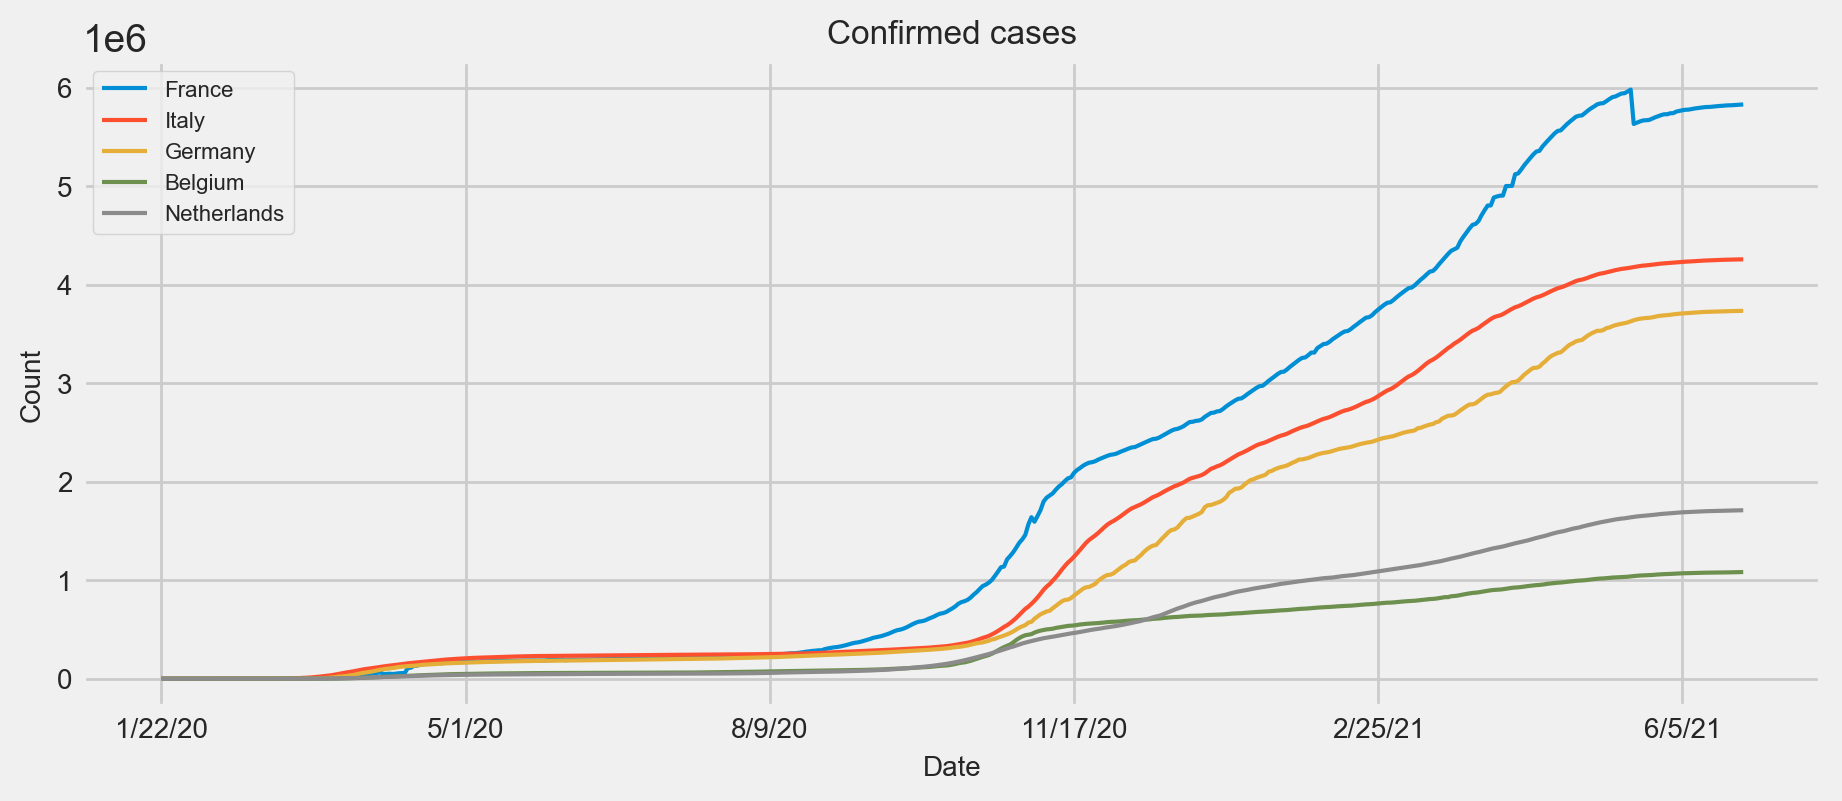

In [40]:
fig , axes = plt.subplots(figsize=(10,4), dpi=200)
countries_all_confirmed_df.plot(ax=axes, linewidth=1.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Confirmed cases", fontsize=12)
plt.xlabel("Date", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.legend(fontsize=8)
plt.show()